/Users/alex/Library/CloudStorage/ProtonDrive-alxxander.nguyen@protonmail.com-folder/Research/Wheeldon/Projects/PhenoTypic/.venv/lib/python3.12/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: divide by zero encountered in matmul
  return rgb @ coeffs
/Users/alex/Library/CloudStorage/ProtonDrive-alxxander.nguyen@protonmail.com-folder/Research/Wheeldon/Projects/PhenoTypic/.venv/lib/python3.12/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: overflow encountered in matmul
  return rgb @ coeffs
/Users/alex/Library/CloudStorage/ProtonDrive-alxxander.nguyen@protonmail.com-folder/Research/Wheeldon/Projects/PhenoTypic/.venv/lib/python3.12/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: invalid value encountered in matmul
  return rgb @ coeffs


(<Figure size 900x1000 with 1 Axes>, <Axes: >)

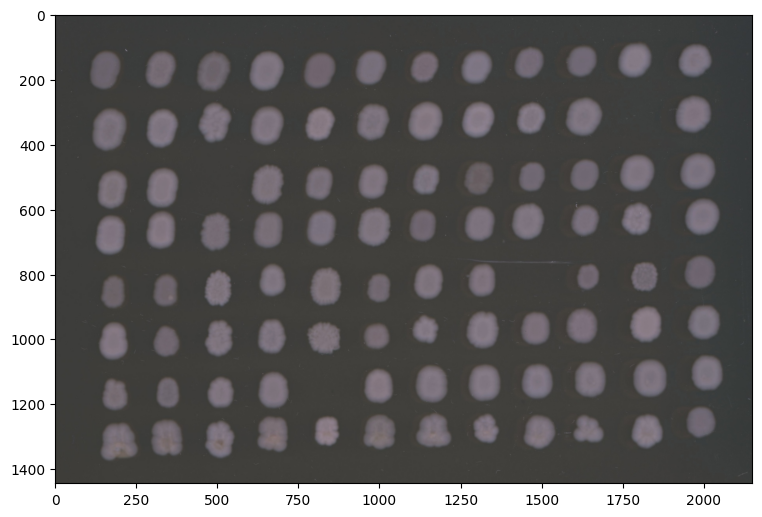

In [1]:
from phenotypic import GridImage, Image

from phenotypic.data import load_plate_72hr

plate_image = GridImage(load_plate_72hr(), name='Plate72Hr')
plate_image.show()

In [2]:
from skimage.color import rgb2gray
print(rgb2gray(load_plate_72hr()).dtype)

float64


/Users/alex/Library/CloudStorage/ProtonDrive-alxxander.nguyen@protonmail.com-folder/Research/Wheeldon/Projects/PhenoTypic/.venv/lib/python3.12/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: divide by zero encountered in matmul
  return rgb @ coeffs
/Users/alex/Library/CloudStorage/ProtonDrive-alxxander.nguyen@protonmail.com-folder/Research/Wheeldon/Projects/PhenoTypic/.venv/lib/python3.12/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: overflow encountered in matmul
  return rgb @ coeffs
/Users/alex/Library/CloudStorage/ProtonDrive-alxxander.nguyen@protonmail.com-folder/Research/Wheeldon/Projects/PhenoTypic/.venv/lib/python3.12/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: invalid value encountered in matmul
  return rgb @ coeffs


In [3]:
from pympler import asizeof

print(f'Array size: {asizeof.asizeof(load_plate_72hr()) / 1000000} mbytes')
print(f'Phenotypic.GridImage: {asizeof.asizeof(plate_image) / 1000000} mbytes')
print(f'Phenotypic.Image: {asizeof.asizeof(Image(load_plate_72hr())) / 1000000} mbytes')

print(f'Ratio: {asizeof.asizeof(plate_image) / asizeof.asizeof(load_plate_72hr())}')

Array size: 9.31396 mbytes
Phenotypic.GridImage: 59.006432 mbytes
Phenotypic.Image: 59.005176 mbytes
Ratio: 6.335259331154525


/Users/alex/Library/CloudStorage/ProtonDrive-alxxander.nguyen@protonmail.com-folder/Research/Wheeldon/Projects/PhenoTypic/.venv/lib/python3.12/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: divide by zero encountered in matmul
  return rgb @ coeffs
/Users/alex/Library/CloudStorage/ProtonDrive-alxxander.nguyen@protonmail.com-folder/Research/Wheeldon/Projects/PhenoTypic/.venv/lib/python3.12/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: overflow encountered in matmul
  return rgb @ coeffs
/Users/alex/Library/CloudStorage/ProtonDrive-alxxander.nguyen@protonmail.com-folder/Research/Wheeldon/Projects/PhenoTypic/.venv/lib/python3.12/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: invalid value encountered in matmul
  return rgb @ coeffs


In [4]:
import os, psutil

proc = psutil.Process(os.getpid())

# RSS: resident set size
rss = proc.memory_info().rss

# Full info gives you USS (unique) on Linux via memory_full_info().uss
full = proc.memory_full_info()
uss = getattr(full, "uss", None)      # Unique Set Size (Linux)
pss = getattr(full, "pss", None)      # Proportional Set Size (Linux)

print(f"RSS = {rss/1024**2:.1f} MB")
if uss is not None:
    print(f"USS = {uss/1024**2:.1f} MB")
if pss is not None:
    print(f"PSS = {pss/1024**2:.1f} MB")

RSS = 492.7 MB
USS = 293.4 MB


In [5]:
total_data_footprint = 0
for data_key, data_value in plate_image._data.__dict__.items():
    print(
        f'{data_key} | {data_value.dtype}: {asizeof.asizeof(data_value) / 1000000} mbytes | shape: {data_value.shape} | fold-increase: {asizeof.asizeof(data_value) / asizeof.asizeof(load_plate_72hr())}')
    total_data_footprint += asizeof.asizeof(data_value)
print(f'Total data footprint: {total_data_footprint / 1000000} mbytes')
print(f'Class overhead: {asizeof.asizeof(plate_image) / 1000000 - total_data_footprint / 1000000}')

array | uint8: 9.31396 mbytes | shape: (1444, 2150, 3) | fold-increase: 1.0
matrix | float64: 24.83696 mbytes | shape: (1444, 2150) | fold-increase: 2.666638035808614
enh_matrix | float64: 24.83696 mbytes | shape: (1444, 2150) | fold-increase: 2.666638035808614
sparse_object_map | uint16: 0.010064 mbytes | shape: (1444, 2150) | fold-increase: 0.0010805285829013653
Total data footprint: 58.997944 mbytes
Class overhead: 0.008408000000002858


/Users/alex/Library/CloudStorage/ProtonDrive-alxxander.nguyen@protonmail.com-folder/Research/Wheeldon/Projects/PhenoTypic/.venv/lib/python3.12/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: divide by zero encountered in matmul
  return rgb @ coeffs
/Users/alex/Library/CloudStorage/ProtonDrive-alxxander.nguyen@protonmail.com-folder/Research/Wheeldon/Projects/PhenoTypic/.venv/lib/python3.12/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: overflow encountered in matmul
  return rgb @ coeffs
/Users/alex/Library/CloudStorage/ProtonDrive-alxxander.nguyen@protonmail.com-folder/Research/Wheeldon/Projects/PhenoTypic/.venv/lib/python3.12/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: invalid value encountered in matmul
  return rgb @ coeffs


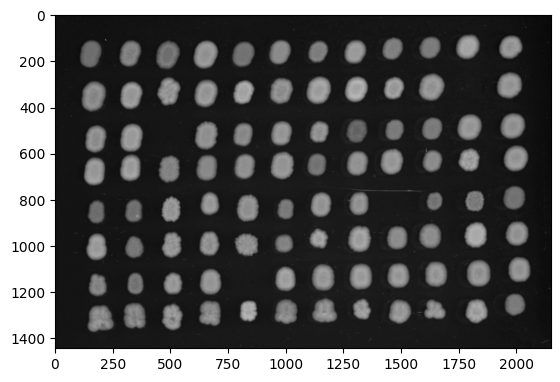

In [6]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
fig, ax = plt.subplots()
ax.grid(False)
ax.imshow(rgb2gray(plate_image.array[:]), cmap='gray')

(<Figure size 800x600 with 1 Axes>, <Axes: >)

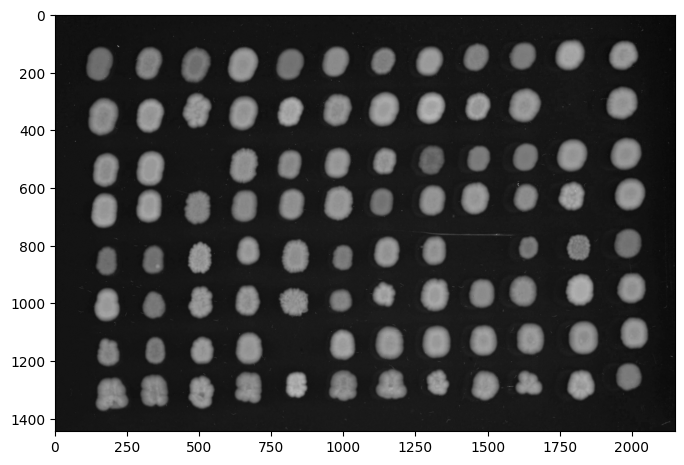

In [7]:
plate_image.matrix.show()

/Users/alex/Library/CloudStorage/ProtonDrive-alxxander.nguyen@protonmail.com-folder/Research/Wheeldon/Projects/PhenoTypic/.venv/lib/python3.12/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: divide by zero encountered in matmul
  return rgb @ coeffs
/Users/alex/Library/CloudStorage/ProtonDrive-alxxander.nguyen@protonmail.com-folder/Research/Wheeldon/Projects/PhenoTypic/.venv/lib/python3.12/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: overflow encountered in matmul
  return rgb @ coeffs
/Users/alex/Library/CloudStorage/ProtonDrive-alxxander.nguyen@protonmail.com-folder/Research/Wheeldon/Projects/PhenoTypic/.venv/lib/python3.12/site-packages/skimage/color/colorconv.py:984: RuntimeWarning: invalid value encountered in matmul
  return rgb @ coeffs


(<Figure size 900x1000 with 1 Axes>, <Axes: >)

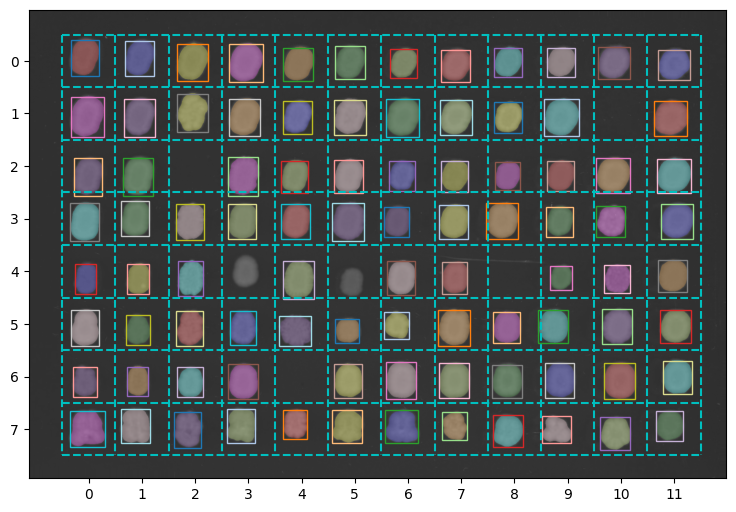

In [8]:
from phenotypic import ImagePipeline
from phenotypic.enhancement import CLAHE, GaussianSmoother, MedianEnhancer, ContrastStretching
from phenotypic.detection import WatershedDetector
from phenotypic.correction import GridAligner, GammaDecoder
from phenotypic.grid import GridApply, MinResidualErrorReducer, GridAlignmentOutlierRemover
from phenotypic.objects import BorderObjectRemover, SmallObjectRemover, LowCircularityRemover
from phenotypic.morphology import MaskFill

from phenotypic.measure import MeasureColor, MeasureShape, MeasureIntensity, MeasureTexture

kmarx_pipeline = ImagePipeline(
    ops={
        'blur': GaussianSmoother(sigma=5),
        'clahe': CLAHE(),
        'median filter': MedianEnhancer(),
        'detection': WatershedDetector(footprint='auto', min_size=50, relabel=True),
        'mask_fill':MaskFill(),
        'RemoveBorderObjects': BorderObjectRemover(),
        'low circularity remover': LowCircularityRemover(0.7),
        'reduce by section residual error': MinResidualErrorReducer(),
        'outlier removal': GridAlignmentOutlierRemover(),
        'align': GridAligner(),
        'grid_reduction': MinResidualErrorReducer(),
    },
    measurements={
        'MeasureColor': MeasureColor(),
        'MeasureShape': MeasureShape(),
        'MeasureIntensity': MeasureIntensity(),
        'MeasureTexture': MeasureTexture(scale=3),
        'MeasureTexture2': MeasureTexture(scale=4),
    }
)

pipeline_output = kmarx_pipeline.apply(plate_image)
pipeline_output.objects.relabel()
pipeline_output.show_overlay()


In [9]:
CLAHE.__name__

'CLAHE'

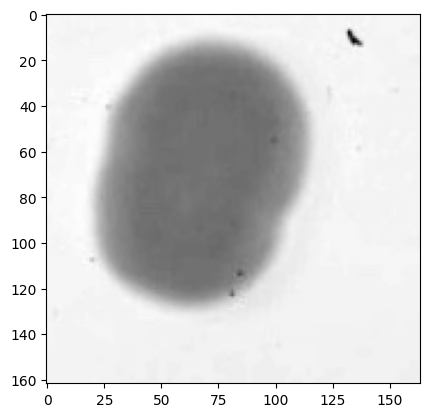

In [10]:
colony_image = pipeline_output.grid[0]
from skimage.util import invert
colony_matrix = invert(colony_image.matrix[:])

import matplotlib.pyplot as plt
plt.imshow(colony_matrix, cmap='gray')

(<Figure size 800x600 with 1 Axes>, <Axes: >)

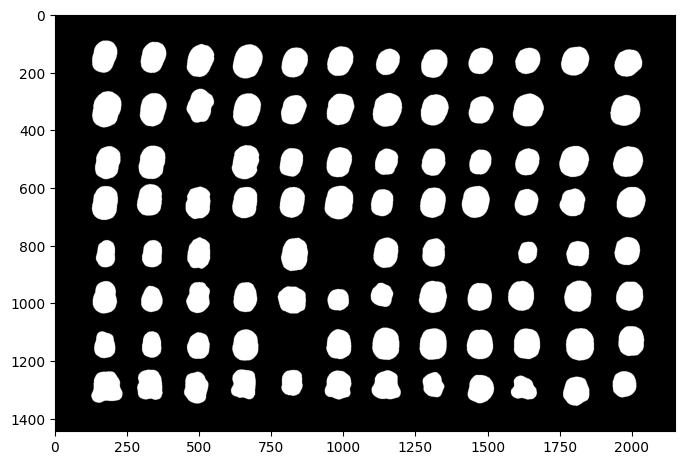

In [11]:
pipeline_output.objmask.show()

In [12]:
# from phenotypic.pipeline import ImagePipelineCore
# from phenotypic.enhancement import CLAHE, GaussianSmoother, MedianEnhancer, ContrastStretching
# from phenotypic.detection import OtsuDetector
# from phenotypic.grid import GridAligner, GridApply, MinResidualErrorReducer, GridAlignmentOutlierRemover
# from phenotypic.objects import BorderObjectRemover, SmallObjectRemover, LowCircularityRemover
#
# from phenotypic.measure import MeasureColor, MeasureShape, MeasureIntensity, MeasureTexture
#
# kmarx_pipeline = ImagePipelineCore(
#     ops={
#         'blur': GaussianSmoother(sigma=10),
#         'clahe': CLAHE(),
#         'median filter': MedianEnhancer(),
#         'detection': OtsuDetector(),
#         'border_removal': BorderObjectRemover(50),
#         'low circularity remover': LowCircularityRemover(0.6),
#         'small object remover': SmallObjectRemover(100),
#         'Reduce by section residual error': MinResidualErrorReducer(),
#         'outlier removal': GridAlignmentOutlierRemover(),
#         'align': GridAligner(),
#         'section-level detect': GridApply(ImagePipelineCore({
#             'blur': GaussianSmoother(sigma=5),
#             'median filter': MedianEnhancer(),
#             'contrast stretching': ContrastStretching(),
#             'detection': OtsuDetector(),
#         }
#         )
#         ),
#         'small object remover 2': SmallObjectRemover(100),
#         'grid_reduction': MinResidualErrorReducer()
#     },
#     measurements={
#         'MeasureColor': MeasureColor(),
#         'MeasureShape': MeasureShape(),
#         'MeasureIntensity': MeasureIntensity(),
#         'MeasureTexture': MeasureTexture()}
# )
#
# pipeline_output = kmarx_pipeline.apply(plate_image)
# pipeline_output.show_overlay()
#


In [13]:
pipeline_output.grid.info()

,Metadata_ImageType,Metadata_ParentImageName,Metadata_ImageName,Bbox_CenterRR,Bbox_CenterCC,Bbox_MinRR,Bbox_MinCC,Bbox_MaxRR,Bbox_MaxCC,Grid_RowNum,Grid_RowInterval,Grid_ColNu_m,Grid_ColInterval,Grid_SectionIndex,Grid_SectionNum
ObjectLabel,,,,,,,,,,,,,,,
1,GridImage,b'',Plate72Hr,146.389728,171.025220,92,129,204,216,0,"(76, 238)",0,"(103, 267)","(0, 0)",0
2,GridImage,b'',Plate72Hr,149.320484,340.361316,96,297,204,386,0,"(76, 238)",1,"(267, 431)","(0, 1)",1
3,GridImage,b'',Plate72Hr,160.806829,503.310931,104,457,218,552,0,"(76, 238)",2,"(431, 595)","(0, 2)",2
4,GridImage,b'',Plate72Hr,163.592914,667.372290,105,616,223,721,0,"(76, 238)",3,"(595, 759)","(0, 3)",3
5,GridImage,b'',Plate72Hr,162.582913,988.458851,112,944,214,1035,0,"(76, 238)",5,"(923, 1087)","(0, 5)",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,GridImage,b'',Plate72Hr,1293.564356,489.112486,1238,447,1349,532,7,"(1211, 1373)",2,"(431, 595)","(7, 2)",86
87,GridImage,b'',Plate72Hr,1283.914791,1311.578175,1240,1275,1327,1350,7,"(1211, 1373)",7,"(1251, 1415)","(7, 7)",91
88,GridImage,b'',Plate72Hr,1298.131035,1475.668566,1249,1431,1348,1523,7,"(1211, 1373)",8,"(1415, 1579)","(7, 8)",92


In [14]:
shape_measurements = MeasureShape().measure(pipeline_output)
shape_measurements

,Shape_Area,Shape_Perimeter,Shape_Circularity,Shape_ConvexArea,Shape_MedianRadius,Shape_MeanRadius,Shape_Eccentricity,Shape_Solidity,Shape_Extent,Shape_BboxArea,Shape_MajorAxisLength,Shape_MinorAxisLength,Shape_Compactness,Shape_Orientation
ObjectLabel,,,,,,,,,,,,,,
1,7613.0,335.563492,0.849603,316.517210,14.000000,15.658120,0.697679,24.052405,0.781301,9744.0,116.511637,83.470191,1.177020,-0.295205
2,7445.0,330.149278,0.858329,311.469473,14.000000,15.638814,0.667029,23.902824,0.774553,9612.0,112.947968,84.149837,1.165054,-0.340896
3,8288.0,348.291414,0.858567,328.237068,14.764823,16.526457,0.650268,25.250043,0.765282,10830.0,117.988329,89.636289,1.164732,-0.378287
4,9455.0,369.362482,0.870895,348.749593,16.000000,17.861013,0.605939,27.111143,0.763115,12390.0,123.119680,97.943036,1.148244,-0.405697
5,7327.0,322.492424,0.885313,306.337331,14.000000,15.824517,0.593671,23.918077,0.789377,9282.0,107.748365,86.705934,1.129544,-0.433380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,7272.0,331.320851,0.832465,311.484939,13.601471,15.143153,0.670905,23.346233,0.770747,9435.0,112.079039,83.111471,1.201251,0.022526
87,4976.0,269.036580,0.863908,255.293855,11.401754,12.770168,0.568069,19.491264,0.762605,6525.0,88.076298,72.485089,1.157530,0.207409
88,7021.0,317.078210,0.877558,300.026625,13.892444,15.540999,0.450041,23.401256,0.770861,9108.0,100.315608,89.582614,1.139525,-0.340076


In [15]:
intensity_measurements = MeasureIntensity().measure(pipeline_output)
intensity_measurements

,Intensity_IntegratedIntensity,Intensity_MinimumIntensity,Intensity_MaximumIntensity,Intensity_MeanIntensity,Intensity_MedianIntensity,Intensity_StandardDeviationIntensity,Intensity_CoefficientVarianceIntensity,Intensity_LowerQuartileIntensity,Intensity_UpperQuartileIntensity,Intensity_InterquartileRangeIntensity
ObjectLabel,,,,,,,,,,
1,2933.874447,0.311414,0.444406,0.385377,0.394091,0.017653,0.045813,0.376276,0.397692,0.021415
2,3082.431938,0.310375,0.449211,0.414027,0.424592,0.028504,0.068856,0.399409,0.434584,0.035175
3,3275.395408,0.321175,0.431167,0.395197,0.398831,0.021245,0.053765,0.385686,0.411761,0.026076
4,4199.409110,0.312269,0.483593,0.444147,0.459015,0.035895,0.080826,0.428050,0.470267,0.042217
5,3103.445762,0.304351,0.457368,0.423563,0.442279,0.033744,0.079678,0.406192,0.448689,0.042497
...,...,...,...,...,...,...,...,...,...,...
86,3202.887343,0.303680,0.499247,0.440441,0.452615,0.036118,0.082016,0.418380,0.469008,0.050628
87,2213.072627,0.301746,0.506686,0.444749,0.458502,0.041264,0.092799,0.421128,0.476198,0.055069
88,3095.907866,0.325562,0.495497,0.440950,0.454311,0.036600,0.083014,0.415938,0.469933,0.053995


In [16]:
texture_measurements = MeasureTexture().measure(pipeline_output)
texture_measurements

,AngularSecondMomentIntensity-deg(0)-scale(5)),AngularSecondMomentIntensity-deg(45)-scale(5)),AngularSecondMomentIntensity-deg(90)-scale(5)),AngularSecondMomentIntensity-deg(135)-scale(5)),ContrastIntensity-deg(0)-scale(5)),ContrastIntensity-deg(45)-scale(5)),ContrastIntensity-deg(90)-scale(5)),ContrastIntensity-deg(135)-scale(5)),CorrelationIntensity-deg(0)-scale(5)),CorrelationIntensity-deg(45)-scale(5)),...,DifferenceEntropyIntensity-deg(90)-scale(5)),DifferenceEntropyIntensity-deg(135)-scale(5)),InformationCorrelation1Intensity-deg(0)-scale(5)),InformationCorrelation1Intensity-deg(45)-scale(5)),InformationCorrelation1Intensity-deg(90)-scale(5)),InformationCorrelation1Intensity-deg(135)-scale(5)),InformationCorrelation2Intensity-deg(0)-scale(5)),InformationCorrelation2Intensity-deg(45)-scale(5)),InformationCorrelation2Intensity-deg(90)-scale(5)),InformationCorrelation2Intensity-deg(135)-scale(5))
ObjectLabel,,,,,,,,,,,,,,,,,,,,,
1,0.053166,0.048860,0.056599,0.050400,8.512472,12.454905,7.055316,10.967733,0.707670,0.560213,...,2.273970,2.790713,-0.239618,-0.156261,-0.257964,-0.155517,0.890886,0.797504,0.907007,0.799196
2,0.011008,0.009445,0.011236,0.009924,22.768830,38.862002,17.163429,28.626307,0.713017,0.486741,...,3.099870,3.479363,-0.181421,-0.114054,-0.186633,-0.120412,0.883037,0.779670,0.890006,0.794682
3,0.013533,0.011679,0.015515,0.013180,12.298264,22.137512,10.773210,16.874359,0.736025,0.503566,...,2.866960,3.159251,-0.190023,-0.104726,-0.201190,-0.131999,0.884369,0.750405,0.895638,0.806553
4,0.016269,0.012609,0.017906,0.014564,26.848505,45.803833,25.292044,39.011480,0.787588,0.618952,...,3.143216,3.553185,-0.261009,-0.168454,-0.257143,-0.174104,0.945549,0.871719,0.944159,0.879190
5,0.027632,0.024713,0.028547,0.025721,24.835998,44.826517,24.990396,36.112925,0.778043,0.577116,...,3.007436,3.496957,-0.269429,-0.171475,-0.237508,-0.167286,0.940471,0.859932,0.923318,0.856840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.005044,0.004336,0.005156,0.004236,37.357100,56.033769,32.176110,59.264350,0.718140,0.570939,...,3.530117,4.042268,-0.180310,-0.104568,-0.176567,-0.108920,0.904070,0.790424,0.901650,0.799222
87,0.003916,0.003398,0.003898,0.003280,49.510240,75.829710,46.964573,79.845785,0.708500,0.549302,...,3.804731,4.224031,-0.179541,-0.119938,-0.174906,-0.110888,0.908806,0.828385,0.905172,0.810344
88,0.005614,0.004713,0.005976,0.004879,23.368147,39.458016,22.665092,36.759780,0.834244,0.707495,...,3.305107,3.690273,-0.250509,-0.167278,-0.227815,-0.160053,0.953041,0.891075,0.941541,0.883424


In [ ]:
single_object = pipeline_output.objects[-1]
fig, ax = single_object.show_overlay()
color_measurements =MeasureColor().measure(pipeline_output)
color_measurements

/Users/alex/Library/CloudStorage/ProtonDrive-alxxander.nguyen@protonmail.com-folder/Research/Wheeldon/Projects/PhenoTypic/src/phenotypic/core/_image_parts/_image_color_handler.py:107: UserWarning: The RGB values have not been decoded using phenotypic's gamma decoder, this may lead to inaccurate results.
  warnings.warn('The RGB values have not been decoded using phenotypic\'s gamma decoder, this may lead to inaccurate results.')


In [19]:
color_measurements

,Color_DomWLMinimum,Color_DomWLLowerQuartile,Color_DomWLMean,Color_DomWLMedian,Color_DomWLUpperQuartile,Color_DomWLMaximum,Color_DomWLStdDev,Color_DomWLCoefficientVariance,Color_PurityMinimum,Color_PurityLowerQuartile,...,Color_SaturationStdDev,Color_SaturationCoefficientVariance,Color_BrightnessMinimum,Color_BrightnessLowerQuartile,Color_BrightnessMean,Color_BrightnessMedian,Color_BrightnessUpperQuartile,Color_BrightnessMaximum,Color_BrightnessStdDev,Color_BrightnessCoefficientVariance
ObjectLabel,,,,,,,,,,,,,,,,,,,,,
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005977,0.029333,...,0.012974,0.152987,0.335038,0.465267,0.487308,0.505882,0.520157,0.544598,0.045527,0.093438


In [ ]:
pipeline_measurements = kmarx_pipeline.measure(pipeline_output)

/Users/alex/Library/CloudStorage/ProtonDrive-alxxander.nguyen@protonmail.com-folder/Research/Wheeldon/Projects/PhenoTypic/src/phenotypic/core/_image_parts/_image_color_handler.py:107: UserWarning: The RGB values have not been decoded using phenotypic's gamma decoder, this may lead to inaccurate results.
  warnings.warn('The RGB values have not been decoded using phenotypic\'s gamma decoder, this may lead to inaccurate results.')


In [18]:
pipeline_measurements

,Bbox_CenterRR,Bbox_CenterCC,Bbox_MinRR,Bbox_MinCC,Bbox_MaxRR,Bbox_MaxCC,Grid_RowNum,Grid_RowInterval,Grid_ColNum,Grid_ColInterval,...,Intensity_IntegratedIntensity,Intensity_MinimumIntensity,Intensity_MaximumIntensity,Intensity_MeanIntensity,Intensity_MedianIntensity,Intensity_StandardDeviationIntensity,Intensity_CoefficientVarianceIntensity,Intensity_LowerQuartileIntensity,Intensity_UpperQuartileIntensity,Intensity_InterquartileRangeIntensity
ObjectLabel,,,,,,,,,,,,,,,,,,,,,
1,146.380271,171.025351,92,129,204,216,0,"(76, 238)",0,"(103, 267)",...,2933.907496,0.311381,0.444404,0.385381,0.394095,0.017653,0.045813,0.376287,0.397699,0.021412
2,149.324288,340.365932,96,297,204,386,0,"(76, 238)",1,"(267, 431)",...,3082.114770,0.310356,0.449218,0.414040,0.424598,0.028486,0.068809,0.399439,0.434577,0.035139
3,160.829410,503.295666,104,457,218,552,0,"(76, 238)",2,"(431, 595)",...,3273.688938,0.321174,0.431179,0.395230,0.398825,0.021217,0.053689,0.385761,0.411769,0.026008
4,163.600719,667.385315,105,616,223,721,0,"(76, 238)",3,"(595, 759)",...,4198.360555,0.312285,0.483596,0.444177,0.459034,0.035864,0.080750,0.428097,0.470268,0.042170
5,162.582913,988.458851,112,944,214,1035,0,"(76, 238)",5,"(923, 1087)",...,3103.462160,0.304337,0.457370,0.423565,0.442288,0.033746,0.079682,0.406198,0.448688,0.042490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,1293.557695,489.115115,1238,447,1349,532,7,"(1211, 1373)",2,"(431, 595)",...,3202.572979,0.303707,0.499251,0.440458,0.452624,0.036094,0.081957,0.418417,0.469010,0.050593
87,1283.913838,1311.598112,1240,1275,1327,1350,7,"(1211, 1373)",7,"(1251, 1415)",...,2214.045903,0.301712,0.506689,0.444677,0.458502,0.041363,0.093036,0.421067,0.476198,0.055131
88,1298.143284,1475.662299,1249,1431,1348,1523,7,"(1211, 1373)",8,"(1415, 1579)",...,3095.935757,0.325541,0.495491,0.440954,0.454324,0.036594,0.083000,0.415946,0.469936,0.053991
